In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Automatically created module for IPython interactive environment


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


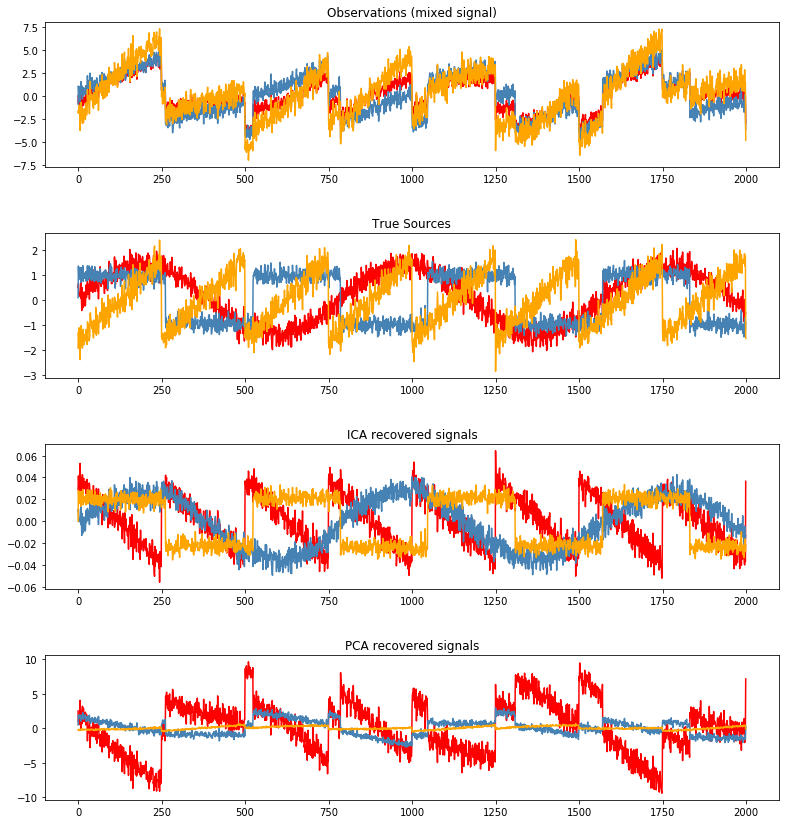

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure(figsize=(12, 12))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()


In [20]:
A = np.zeros((n_samples, n_samples))
decay_theta = 0.01
t = np.arange(n_samples)
for i in xrange(n_samples):
    A[i, :] = 0.2 * np.exp(-np.abs(t - i) * decay_theta)

In [21]:
C = np.linalg.cholesky(A)

In [29]:
sine_series = []
num_sine_series = 10

time = np.linspace(0, 8, n_samples)
for i in xrange(num_sine_series):
    X = np.c_[np.sin(2 * time)] + np.dot(C, np.random.normal(size=(n_samples, 1)))
    sine_series.append(X)

sine_series = np.reshape(sine_series, (num_sine_series, n_samples))

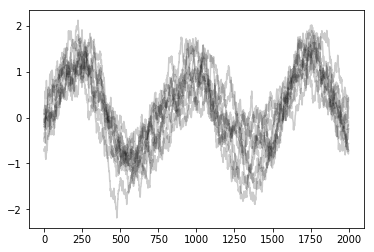

In [47]:
_ = plot(sine_series.T, c='k', alpha=0.2)

In [38]:
sign_series = []
num_sign_series = 5

time = np.linspace(0, 8, n_samples)
for i in xrange(num_sign_series):
    X = np.c_[np.sign(np.sin(3 * time))] + np.dot(C, np.random.normal(size=(n_samples, 1)))
    sign_series.append(X)

sign_series = np.reshape(sign_series, (num_sign_series, n_samples))

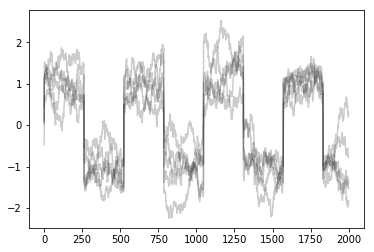

In [46]:
_ = plot(sign_series.T, c='k', alpha=0.2)

In [44]:
sawtooth_series = []
num_sawtooth_series = 15

time = np.linspace(0, 8, n_samples)
for i in xrange(num_sawtooth_series):
    X = np.c_[signal.sawtooth(2 * np.pi * time)] + np.dot(C, np.random.normal(size=(n_samples, 1)))
    sawtooth_series.append(X)

sawtooth_series = np.reshape(sawtooth_series, (num_sawtooth_series, n_samples))

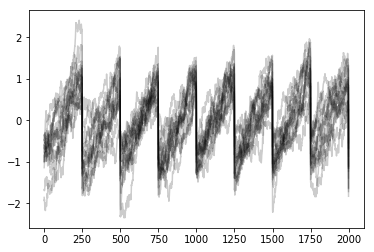

In [45]:
_ = plot(sawtooth_series.T, c='k', alpha=0.2)

In [64]:
total_series = np.vstack((sign_series, sign_series, sawtooth_series))

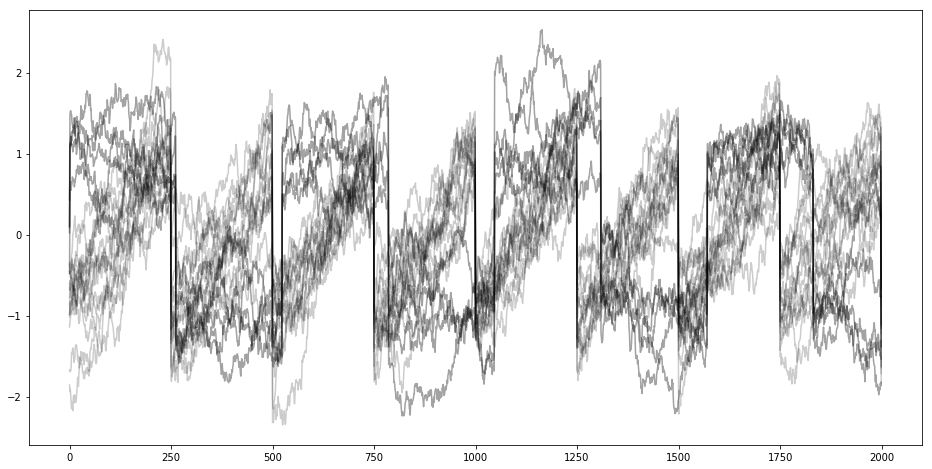

In [75]:
figure(figsize=(16, 8))
_ = plot(total_series.T, c='k', alpha=0.2)

In [55]:
total_series = total_series[np.random.permutation(range(25)), :]

In [65]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(total_series.T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


In [79]:
A_

array([[  4.59430104, -40.48352472,  -1.01743413],
       [ 21.9369011 , -45.19734291,  -0.9845898 ],
       [ 17.20335693, -46.12150081,   5.47205255],
       [  1.51586167, -44.95207878,   1.50418413],
       [ -6.49437146, -45.78292898,   2.49465939],
       [  4.59430104, -40.48352472,  -1.01743413],
       [ 21.9369011 , -45.19734291,  -0.9845898 ],
       [ 17.20335693, -46.12150081,   5.47205255],
       [  1.51586167, -44.95207878,   1.50418413],
       [ -6.49437146, -45.78292898,   2.49465939],
       [ -7.55651471,   1.21854074, -20.90408839],
       [ -9.28958593,  -4.15305283, -19.4329701 ],
       [  2.06676799,  -6.33919909, -29.29679178],
       [  2.31480286,   1.52491305, -27.34130542],
       [ -5.55926881,   1.76923064, -28.81126581],
       [ -2.32375111,  -0.78180991, -27.07955198],
       [  7.49380289,   0.71537787, -31.64433269],
       [-11.30011842,  -1.03480238, -21.17621681],
       [  1.65244925,  -6.42919857, -28.34765793],
       [ -6.58553516,  -9.11122

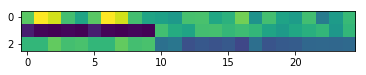

In [73]:
imshow(A_.T, interpolation='nearest')

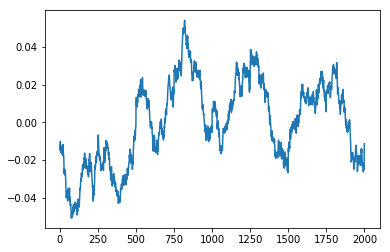

In [69]:
plot(S_.T[0])

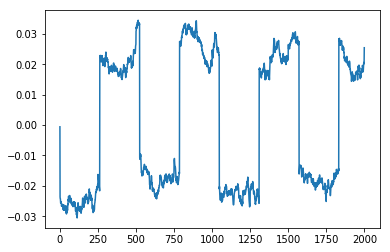

In [70]:
plot(S_.T[1])

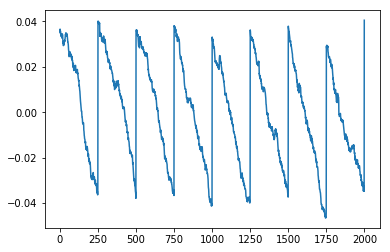

In [71]:
plot(S_.T[2])